In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from scipy.spatial.distance import pdist, squareform

# Crea un nuevo directorio para almacenar las imágenes de flores
data_dir = 'flowers'
os.makedirs(data_dir, exist_ok=True)

# Descarga y descomprime el archivo ZIP del dataset de flores en el directorio creado
# en el paso anterior.

# Recorre el directorio de imágenes y convierte cada imagen en un vector de características
data = []
for flower_type in os.listdir(data_dir):
    flower_dir = os.path.join(data_dir, flower_type)
    if os.path.isdir(flower_dir):
        for filename in os.listdir(flower_dir):
            if filename.endswith('.jpg'):
                image_path = os.path.join(flower_dir, filename)
                with Image.open(image_path) as img:
                    img = img.resize((64, 64))  # Cambia la resolución de la imagen
                    img_array = np.array(img)
                    features = img_array.flatten()  # Convierte la imagen en un vector de características
                    data.append({'filename': filename, 'flower_type': flower_type, 'features': features})

# Convierte la lista de diccionarios en un DataFrame y guárdalo como un archivo CSV
df = pd.DataFrame(data)
df.to_csv('flowers.csv', index=False)


/tmp/ipykernel_26486/948870888.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df['features'] = df['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


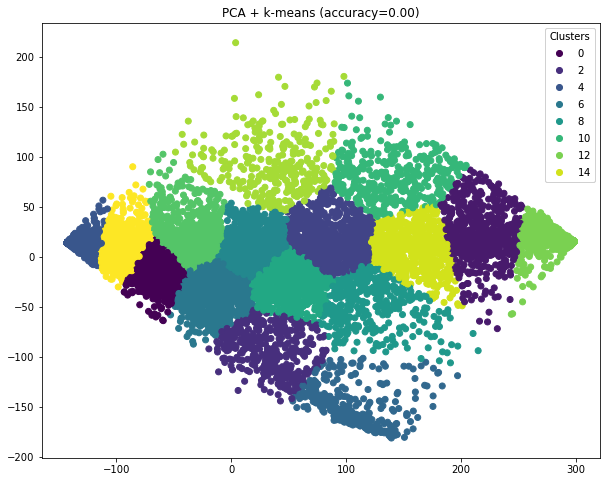

In [2]:


# Cargar los datos del archivo CSV
df = pd.read_csv('flowers.csv')

# Convertir la columna 'features' de cadenas de caracteres a una matriz numérica
df['features'] = df['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# Aplicar PCA en dos dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df['features'].tolist())

# Aplicar k-means en dos clusters
kmeans = KMeans(n_clusters=16)
y_pred = kmeans.fit_predict(X_pca)

# Calcular la exactitud
y_true = df['flower_type'].values
accuracy = np.mean(y_pred == y_true)

# Graficar el resultado
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_title(f'PCA + k-means (accuracy={accuracy:.2f})')
plt.show()


/tmp/ipykernel_26486/1038369037.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df['features'] = df['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


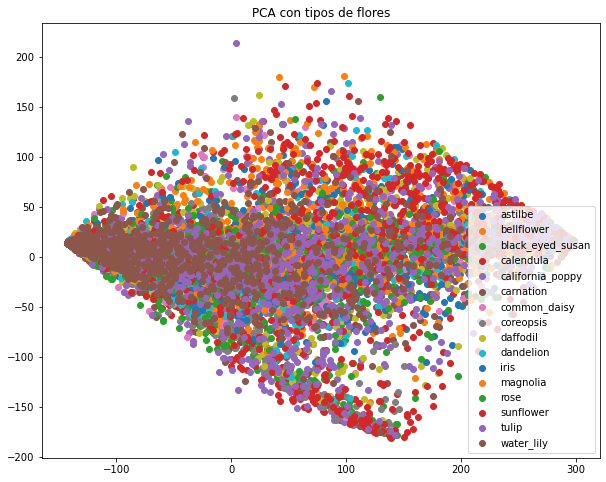

In [3]:
# Cargar los datos del archivo CSV
df = pd.read_csv('flowers.csv')

# Convertir la columna 'features' de cadenas de caracteres a una matriz numérica
df['features'] = df['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# Aplicar PCA en dos dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df['features'].tolist())

# Obtener los tipos de flores
types = df['flower_type'].unique()

# Graficar las flores con su respectivo tipo
fig, ax = plt.subplots(figsize=(10, 8))
for t in types:
    mask = df['flower_type'] == t
    ax.scatter(X_pca[mask, 0], X_pca[mask, 1], label=t)
ax.legend()
ax.set_title('PCA con tipos de flores')
plt.show()


## MDS

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans

# Cargar los datos del archivo CSV
df = pd.read_csv('flowers.csv')

# Convertir la columna 'features' de cadenas de caracteres a una matriz numérica
df['features'] = df['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))

# Aplicar MDS en dos dimensiones
mds = MDS(n_components=2)
X_mds = mds.fit_transform(df['features'].tolist())

# Aplicar k-means en dos clusters
kmeans = KMeans(n_clusters=16)
y_pred = kmeans.fit_predict(X_mds)

# Calcular la exactitud
y_true = df['flower_type'].values
accuracy = np.mean(y_pred == y_true)

# Graficar el MDS con las flores
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_mds[:, 0], X_mds[:, 1], c=y_true, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Flowers")
ax.add_artist(legend)
ax.set_title('MDS')
plt.show()

# Graficar el clustering con las flores
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(X_mds[:, 0], X_mds[:, 1], c=y_pred, cmap='viridis')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_title(f'K-Means (accuracy={accuracy:.2f})')
plt.show()


/tmp/ipykernel_26486/3395102677.py:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df['features'] = df['features'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))


KeyboardInterrupt: 